<a href="https://colab.research.google.com/github/moraes-ederson/Curso_DominandoDS_Flai/blob/main/5_1_Comb_Modelos_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pré-processamento e Tunagem de Hiperparâmetros**

##Uma terceira proposta de pré-processamento para o conjunto de dados do Titanic

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
caminho1 = '/content/train.csv'
caminho2 = '/content/test.csv'
treino = pd.read_csv(caminho1)
teste = pd.read_csv(caminho2)

In [ ]:
n = treino.shape[0]

In [ ]:
# guardando em uma lista a variável resposta como target (alvo)
targets = list(treino['Survived'])
targets

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


Concatenando os dois datasets um abaixo do outro para realizar as transformações uma única vez sem a necessidade de fazer uma alteração nos dados de treino e depois replicar nos dados de teste.

In [ ]:
dataset = pd.concat([treino, teste])

In [ ]:
dataset.shape

(1309, 12)

In [ ]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Transformando as variáveis.

In [ ]:
# mapeando a variável sexo em 0 e 1
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# pegar apenas o título da pessoa presente na variável 'Name'

def aux(x):
  return x.split(', ')[1].split('. ')[0]

dataset['Titulo'] = dataset['Name'].apply(aux)

In [ ]:
titulos = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}

dataset['Titulacao'] = dataset['Titulo'].map(titulos)

In [ ]:
# com isso, a variável 'Outros' que foi definida na aula passada, passa a ser ocupada pelas titulações correspondentes como acima.

dataset['Survived'].groupby(dataset['Titulacao']).describe()

,count,mean,std,min,25%,50%,75%,max
Titulacao,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.00,1.0
Miss,184.0,0.701087,0.459031,0.0,0.0,1.0,1.00,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.00,1.0
Mrs,127.0,0.795276,0.405098,0.0,1.0,1.0,1.00,1.0
Officer,18.0,0.277778,0.460889,0.0,0.0,0.0,0.75,1.0
Royalty,5.0,0.600000,0.547723,0.0,0.0,1.0,1.00,1.0


In [ ]:
# variável Cabin que descartamos anteriormente, vamos usar agora

dataset['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [ ]:
# pegando apenas a primeira letra da variável

def aux2(x):
  return list(str(x))[0]

dataset['Cabin'] = dataset['Cabin'].apply(aux2)

In [ ]:
dataset['Cabin'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [ ]:
# variável parch e sibsb: criando a variável 'Familia'

dataset['Familia'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
def aux3(x):
  if x == 1:
    return 'Sozinho'
  elif x <= 4:
    return 'Pequena'
  else:
    return 'Grande'
  
dataset['FamiliaTipo'] = dataset['Familia'].apply(aux3)

FamiliaTipo
Grande     0.161290
Pequena    0.578767
Sozinho    0.303538
Name: Survived, dtype: float64

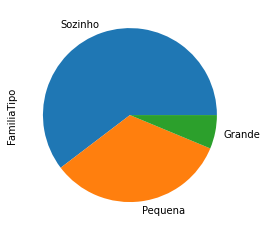

In [ ]:
dataset['FamiliaTipo'].value_counts().plot(kind = 'pie')

dataset['Survived'].groupby(dataset['FamiliaTipo']).mean()

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,Titulacao,Familia,FamiliaTipo
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,n,S,Mr,Mr,2,Pequena
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Mrs,2,Pequena
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,n,S,Miss,Miss,1,Sozinho
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,Mrs,2,Pequena
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,n,S,Mr,Mr,1,Sozinho


In [ ]:
# dropando variáveis que não serão mais utilizadas
variaveis = ['PassengerId', 'Name', 'Ticket', 'Titulo']

dataset.drop(variaveis, axis = 1, inplace = True)

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titulacao,Familia,FamiliaTipo
0,0.0,3,0,22.0,1,0,7.2500,n,S,Mr,2,Pequena
1,1.0,1,1,38.0,1,0,71.2833,C,C,Mrs,2,Pequena
2,1.0,3,1,26.0,0,0,7.9250,n,S,Miss,1,Sozinho
3,1.0,1,1,35.0,1,0,53.1000,C,S,Mrs,2,Pequena
4,0.0,3,0,35.0,0,0,8.0500,n,S,Mr,1,Sozinho


In [ ]:
# dummificação

dummificar = ['Pclass', 'Cabin', 'Embarked', 'Titulacao', 'FamiliaTipo']
dataset = pd.get_dummies(dataset, columns = dummificar)

In [ ]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,0,22.0,1,0,7.2500,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1.0,1,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0.0,0,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


Identificando dados faltantes (missings)

In [ ]:
dataset.isnull().sum()

Survived               418
Sex                      0
Age                    263
SibSp                    0
Parch                    0
Fare                     1
Familia                  0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Cabin_A                  0
Cabin_B                  0
Cabin_C                  0
Cabin_D                  0
Cabin_E                  0
Cabin_F                  0
Cabin_G                  0
Cabin_T                  0
Cabin_n                  0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
Titulacao_Master         0
Titulacao_Miss           0
Titulacao_Mr             0
Titulacao_Mrs            0
Titulacao_Officer        0
Titulacao_Royalty        0
FamiliaTipo_Grande       0
FamiliaTipo_Pequena      0
FamiliaTipo_Sozinho      0
dtype: int64

In [ ]:
# variável 'Age'
# usar quando tiver tudo numérico
# preenchendo dados faltantes com KNNImputer

from sklearn.impute import KNNImputer
imputer = KNNImputer()

# ajuste da transformação apenas nos dados de treino representado por n-1
knnimp = imputer.fit(dataset.loc[:n-1, :].drop('Survived', axis = 1))

# fazendo a "imputação" nos dados faltantes
knnimp = imputer.transform(dataset.drop('Survived', axis = 1))

In [ ]:
knnimp

array([[ 0. , 22. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 38. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 26. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 28.6,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 16.6,  1. , ...,  0. ,  1. ,  0. ]])

In [ ]:
# transformar o resultado em DataFrame novamente
dataset = pd.DataFrame(knnimp, columns = dataset.columns[1:])

In [ ]:
dataset.head()

,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,22.0,1.0,0.0,7.2500,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset.isnull().sum()

Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Familia                0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Cabin_A                0
Cabin_B                0
Cabin_C                0
Cabin_D                0
Cabin_E                0
Cabin_F                0
Cabin_G                0
Cabin_T                0
Cabin_n                0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
Titulacao_Master       0
Titulacao_Miss         0
Titulacao_Mr           0
Titulacao_Mrs          0
Titulacao_Officer      0
Titulacao_Royalty      0
FamiliaTipo_Grande     0
FamiliaTipo_Pequena    0
FamiliaTipo_Sozinho    0
dtype: int64

Voltando às divisões dos dados em treino e teste

In [ ]:
treino = dataset.loc[:n-1, :]
teste = dataset.loc[n:, :]

In [ ]:
treino.shape

(891, 30)

In [ ]:
# lembrando que a variável resposta foi separada e guardada na variável 'Targets'
# logo, treino e teste tem a mesma quantidade de colunas
teste.shape

(418, 30)

Padronização das variáveis contínuas

O cálculo é subtrair a média da variável e dividir pelo desvio padrão da variável

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

aux0 = sc.fit_transform(treino[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
treino = pd.concat([treino, aux1], axis = 1)
treino.drop(['Age', 'Fare'], axis = 1, inplace = True)

In [ ]:
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = teste.reset_index()
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare', 'index'], axis = 1, inplace = True)

In [ ]:
treino.head()

,Sex,SibSp,Parch,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho,Idade,Tarifa
0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.575796,-0.502445
1,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.598609,0.786845
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.282195,-0.488854
3,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.378408,0.420730
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.378408,-0.486337


## Escolher as melhores variáveis

### Usando o Random Forest como modelo básico

O Random Forest, assim como os demais modelos baseados em árvores de decisão, possui um output interessante, chamado feature importance. É um atributo que nos informa quais variáveis são mais importantes para o modelo. Dessa maneira, é possível fazer uma seleção das variáveis mais importantes para utilizar em um modelo final.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_base = RandomForestClassifier(max_depth = 3)
modelo_base.fit(treino, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# obtendo a importância de cada variável
modelo_base.feature_importances_

array([2.70941014e-01, 9.18693195e-03, 7.92835229e-03, 3.28047175e-02,
       3.72394463e-02, 4.89195793e-03, 5.58555316e-02, 4.01768741e-04,
       8.80564322e-03, 1.51537030e-03, 3.80131974e-03, 1.98630229e-03,
       1.25327099e-03, 9.83372782e-05, 0.00000000e+00, 4.70397531e-02,
       2.93744640e-03, 1.08679142e-03, 6.39820469e-03, 8.15325146e-03,
       9.10327764e-02, 1.73198297e-01, 6.04052280e-02, 1.36650988e-03,
       6.40381589e-04, 1.53228206e-02, 3.79694219e-02, 1.04279246e-02,
       2.80504057e-02, 7.92608230e-02])

In [ ]:
variaveis = pd.DataFrame()
variaveis['variavel'] = treino.columns
variaveis['importancia'] = modelo_base.feature_importances_
variaveis.sort_values(by = 'importancia', ascending = False)

,variavel,importancia
0,Sex,0.270941
21,Titulacao_Mr,0.173198
20,Titulacao_Miss,0.091033
29,Tarifa,0.079261
22,Titulacao_Mrs,0.060405
6,Pclass_3,0.055856
15,Cabin_n,0.047040
26,FamiliaTipo_Pequena,0.037969
4,Pclass_1,0.037239
3,Familia,0.032805


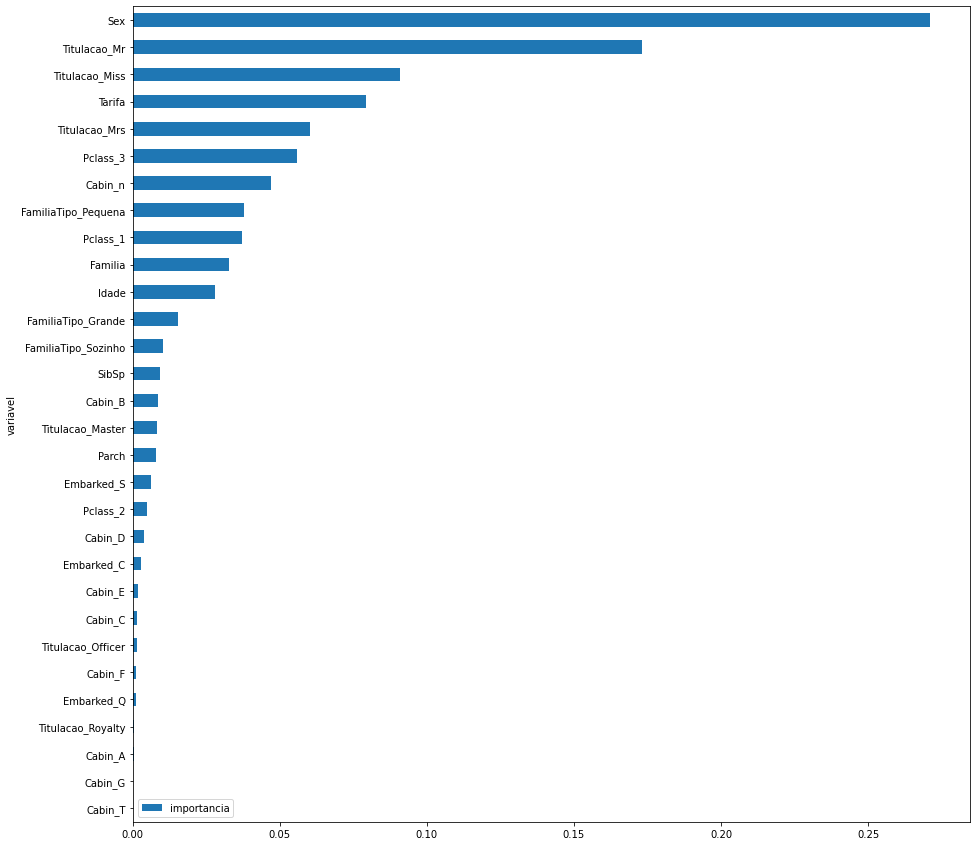

In [ ]:
variaveis.sort_values(by = 'importancia', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind = 'barh', figsize = (15, 15))

## Selecionando as variáveis mais importantes com a função SelectFromModel, do scikit learn.

In [ ]:
from sklearn.feature_selection import SelectFromModel

seletor = SelectFromModel(modelo_base, prefit = True, max_features = 11, threshold = -np.inf)

treino_reduzido = seletor.transform(treino)
print(treino_reduzido.shape)

teste_reduzido = seletor.transform(teste)
print(teste_reduzido.shape)

(891, 11)
(418, 11)


## **Melhor KNN**
Hipertunagem de parâmetros nada mais é do que encontrar qual a melhor combinação de valores que passamos aos algoritmos no momento de seu treinamento. Alguns modelos tem poucos hiperparâmetros que se deseja tunar, outros têm muitos.

Para fazer essa checagem, testa-se através de um método de validação selecionado, o desempenho de cada possível combinação de hiperparâmetros apresentado. Logo se vê que se necessita de bastante poder computacional para realizar tal checagem.

Na função abaixo, temos um programa que realiza a busca pelos hiperparâmetros. Veja que ela utiliza dois tipos de hipertunagem de parâmetros, o tipo = 'tudo', que testa todo espaço de parâmetros apresentado (custoso, lento, preciso), e o tipo = 'aleatorio', que testa apenas uma amostra aleatória do espaço de parâmetros (menos custoso, rápido, menos preciso).

Nesse exemplo, estamos procurando qual é o melhor K para o KNN. Varremos todas as possibilidades de 1 até 49, de 2 em 2, o que totaliza 25 modelos diferentes para se testar. E em cada modelo, é aplicada a estratégia de validação correspondente, muitas vezes envolvendo várias iterações do K-Fold.

Devemos escolher entre as duas estratégias levando em consideração o recurso computacional que temos em mão e o tempo que podemos dispor para encontrar a solução.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [ ]:
modelo = KNeighborsClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

parametros = {'n_neighbors': np.arange(1, 50, 2)}

grid_search = GridSearchCV(modelo, param_grid = parametros,
                           scoring = 'accuracy',
                           cv = validacao,
                           verbose = 1, # quantidade de prints que aparecerá na tela
                           n_jobs = -1) # número de processadores disponíveis. -1 utiliza tudo que estiver disponível

# fazendo a validação cruzada
grid_search.fit(treino, targets)

Fitting 30 folds for each of 25 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    8.1s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
melhor_modelo = grid_search.best_params_
melhor_modelo

{'n_neighbors': 31}

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.75378693, 0.79235123, 0.80731169, 0.80581773, 0.80508947,
       0.81370787, 0.80398252, 0.80397836, 0.80435705, 0.80697462,
       0.80361215, 0.80810237, 0.81145651, 0.81183104, 0.8140824 ,
       0.81558052, 0.81258427, 0.8137037 , 0.81034124, 0.80509779,
       0.8047191 , 0.80509779, 0.80434457, 0.8058427 , 0.80396588])

In [ ]:
def SearchKNN(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'n_neighbors' : np.arange(1, 50, 2)
                 }

    modelo = KNeighborsClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'tudo':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 10, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor

In [ ]:
knn = SearchKNN(treino_reduzido, targets, tipo = 'tudo')

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Acuracia: 0.8156
Melhores parâmetros: {'n_neighbors': 31}



[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.5s finished


## **Melhor Árvore**

In [ ]:

def SearchARVORE(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'max_depth' : np.arange(1,11), # 10 combinações
                 'min_samples_split': np.arange(2,12), # 10 combinações
                 'min_samples_leaf': np.arange(1,11), # 10 combinações
                 }

    modelo = DecisionTreeClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 10, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor

In [ ]:
arvore = SearchARVORE(treino, targets, tipo = 'tudo')

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   18.3s



Acuracia: 0.8317
Melhores parâmetros: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}



[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   34.2s finished


## **Melhor Random Forest**

In [ ]:
def SearchRF(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'max_depth' : [2, 4, 6, 8, 10],
                 'n_estimators': [50, 100, 150],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5],
                 'bootstrap': [True, False]
                 }

    modelo = RandomForestClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 20, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor_rf = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor_rf

In [ ]:
rf = SearchRF(treino_reduzido, targets, tipo = 'aleatorio')

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.7s



Acuracia: 0.8373
Melhores parâmetros: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': False}



[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.3s finished


##Observação: Se o conjunto de dados de entrada for alterado, então a otimização de parâmetros deve ser refeita! O melhor conjunto de hiperparâmetros pode ser único para cada tipo de pré-processamento utilizado

In [ ]:
rf1 = SearchRF(treino_reduzido, targets, tipo = 'aleatorio')

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.2s finished



Acuracia: 0.8440
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}



In [ ]:
rf1

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Função para criar arquivos de submissão no Kaggle

def Submissao(treino, targets, teste, modelo, nome = 'submissaoKaggle'):
  
    modelo.fit(treino, targets)
    pred = modelo.predict(teste)

    url = '/content/test.csv' 
    subm = pd.read_csv(url, usecols = ['PassengerId'] )  
    subm['Survived'] = pred
    
    subm.to_csv(nome + '.csv', index = False)

In [ ]:
#Bloco para gerar submissao

modelo = rf1
nome = 'GridSearchRF-SetupXYZred' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)

In [ ]:
# Criando uma combinação Hard e uma Soft dos algoritmos otimizados nesse script + Regressão Logística.
# Preparando e submetendo direto no Kaggle.

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression() 

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore), ('RF', rf) ]

modelo1 = VotingClassifier(modelos, voting = 'hard')
modelo2 = VotingClassifier(modelos, voting = 'soft')


modelo = modelo1
nome = 'SubmissaoCombinacaoHard' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)

modelo = modelo2
nome = 'SubmissaoCombinacaoSoft' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)